In [1]:
using Plots
using Random
using LaTeXStrings
include("../Potential/chaotic.jl")
include("../inflationBasicEqs.jl")
include("../inflationSDE.jl")
include("../sampling.jl")
include("../fitting.jl")

FitByBinAve (generic function with 1 method)

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
dN = 0.01
m = 0.0211
phiIni = 11.0
vIni = -m * sqrt(2.0 / 3.0)
nPath = 100000
iniVec = [phiIni, vIni]

potFunc = makePotFuncChaotic(m)
potDerFunc = makePotDerFuncChaotic(m)
potDer2Func = makePotDer2FuncChaotic(m)

sigma = 0.1
epsilonEnd = 0.3
driftFunc, volFunc = makeDriftAndVolFunc(
    potFunc, potDerFunc, potDer2Func, "Epsilon",
    epsilonEnd=epsilonEnd, infPSType="NextSR", additionalParams=Dict("sigma" => sigma))

(var"#drift!#11"{var"#f#1"{Float64}, var"#f#2"{Float64}}(var"#f#1"{Float64}(0.0211), var"#f#2"{Float64}(0.0211), Core.Box(var"#5#9"{Float64, var"#f#1"{Float64}}(0.3, var"#f#1"{Float64}(0.0211)))), var"#vol!#14"{var"#f#1"{Float64}}(var"#f#1"{Float64}(0.0211), Core.Box(var"#8#13"{var"#f#1"{Float64}, var"#f#3"{Float64}}(var"#f#1"{Float64}(0.0211), var"#f#3"{Float64}(0.0211), Core.Box(0.1))), Core.Box(var"#5#9"{Float64, var"#f#1"{Float64}}(0.3, var"#f#1"{Float64}(0.0211)))))

In [4]:
NsPsMin = 23.0
NsPsMax = 28.0
NSimEnd = 33.0

33.0

In [5]:
NTotFilePath = "NTot.csv"
NTotDf = SampleNTotAdd2Paths(nPath, iniVec, NSimEnd, [NsPsMin, NsPsMax], driftFunc, volFunc, dN, NTotFilePath)

iPath=1 :2025-05-13T15:16:27.345
iPath=1001 :2025-05-13T15:16:35.226
iPath=2001 :2025-05-13T15:16:40.259
iPath=3001 :2025-05-13T15:16:45.271
iPath=4001 :2025-05-13T15:16:50.330
iPath=5001 :2025-05-13T15:16:55.342
iPath=6001 :2025-05-13T15:17:00.442
iPath=7001 :2025-05-13T15:17:05.348
iPath=8001 :2025-05-13T15:17:10.242
iPath=9001 :2025-05-13T15:17:15.108
iPath=10001 :2025-05-13T15:17:20.075
iPath=11001 :2025-05-13T15:17:24.975
iPath=12001 :2025-05-13T15:17:29.891
iPath=13001 :2025-05-13T15:17:34.757
iPath=14001 :2025-05-13T15:17:39.658
iPath=15001 :2025-05-13T15:17:44.707
iPath=16001 :2025-05-13T15:17:49.554
iPath=17001 :2025-05-13T15:17:54.506
iPath=18001 :2025-05-13T15:17:59.558
iPath=19001 :2025-05-13T15:18:04.889
iPath=20001 :2025-05-13T15:18:09.920
iPath=21001 :2025-05-13T15:18:15.006
iPath=22001 :2025-05-13T15:18:19.938
iPath=23001 :2025-05-13T15:18:24.805
iPath=24001 :2025-05-13T15:18:29.737
iPath=25001 :2025-05-13T15:18:34.638
iPath=26001 :2025-05-13T15:18:39.466
iPath=27001 :2

Row,NBk,NTot1,NTot2,phi_vel_vec_elem1,phi_vel_vec_elem2
,Float64,Float64,Float64,Float64,Float64
1,24.7462,28.8,29.69,10.0844,-0.017173
2,23.964,29.5,29.67,9.8659,-0.0171705
3,23.8386,29.83,29.71,10.0058,-0.0171721
4,23.0068,29.01,29.06,9.78824,-0.0171695
5,23.0623,29.46,29.35,9.77805,-0.0171695
6,26.1161,29.36,29.27,10.3618,-0.0171758
7,27.5017,29.49,29.55,10.6581,-0.0171787
8,26.6528,29.72,29.29,10.5178,-0.0171772
9,26.3071,28.97,29.4,10.4344,-0.0171765


In [6]:
fitResult, delNSqFit, psFit, delNSqErr, psErr = FitByLS(NTotDf, "exp", 2, NsPsMin, NsPsMax)

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([-2.752561181614044, 0.24543859582648897, -0.009799100783028886], [-0.33662271631527146, 0.040353381415835055, 0.04688134376378656, 0.04818696893167465, 0.04368939376223191, 0.06396202378058682, 0.07546094173180337, -0.020918304204985902, -0.023194567283483805, -0.1300555093701138  …  0.0064644834415652636, 0.03739324839054739, 0.0417613727178783, 0.06794634933046717, 0.0541021795127106, 0.012104248147591472, 0.042563757246754416, 0.01682586418663133, -0.013296889248934324, -0.03673563670869745], [0.059427283684852346 -0.01791833753598174 -0.021609616212817675; 0.054803381415839576 -0.0336703079464551 0.003628045266039258; … ; 0.06670311075109069 0.01102285496250514 -0.03061922407593416; 0.060064363291332815 -0.015585708390747303 -0.023965831498994755], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float6

In [7]:
fitResult.param

3-element Vector{Float64}:
 -2.752561181614044
  0.24543859582648897
 -0.009799100783028886

In [8]:
confidence_interval(fitResult, 0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (-2.7616615627497882, -2.7434608004782994)
 (0.22940892756969392, 0.26146826408328405)
 (-0.029791940761950422, 0.01019373919589265)

In [9]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitVals = [delNSqFit(N) for N in NsPS]
psFitVals = [psFit(N) for N in NsPS]
delNSqErrVals = [delNSqErr(N) for N in NsPS]
psErrVals = [psErr(N) for N in NsPS]

100-element Vector{Float64}:
 NaN
   0.0005825092955322135
   0.0005773754876272722
   0.0005720891684284715
   0.0005666498575343108
   0.0005610571484016716
   0.0005553107153572955
   0.0005494103213902146
   0.0005433558268282258
   0.0005371471990169634
   0.0005307845231381758
   0.000524268014324957
   0.0005175980312563978
   ⋮
   0.0007429273606543501
   0.0007671673333012043
   0.0007917310176469217
   0.0008166154805972968
   0.0008418181065547962
   0.0008673365612108446
   0.0008931687597585331
   0.0009193128389302013
   0.0009457671323501465
   0.0009725301487655157
   0.0009996005527805071
 NaN

In [21]:
NBksBin = LinRange(NsPsMin, NsPsMax, 8)
delNSqBinAve, psBinAve, delNSqBinAveErr, psBinAveErr, NBksdelNSq, NBksPS = FitByBinAve(NTotDf, NBksBin)

(Any[0.05175571478505637, 0.05553205741628531, 0.05870239804811873, 0.06400918287105231, 0.06888500349408162, 0.07442997018239618, 0.07751753242252232], [0.005286879683720508, 0.004438476884566781, 0.007429498752107007, 0.0068261488722410266, 0.007762953363640368, 0.0043225871361765944], Any[0.0006050702455020596, 0.000649427542546241, 0.0006988867341978126, 0.0007757083203094053, 0.0008019529052364507, 0.0008731322161576139, 0.0009118106177206731], [0.001242665532079633, 0.0013356607535225584, 0.001461754250293955, 0.001562021013434922, 0.001659746102587559, 0.0017674180603868728], LinRange{Float64}(23.357142857142858, 27.642857142857146, 7), LinRange{Float64}(23.714285714285715, 27.28571428571429, 6))

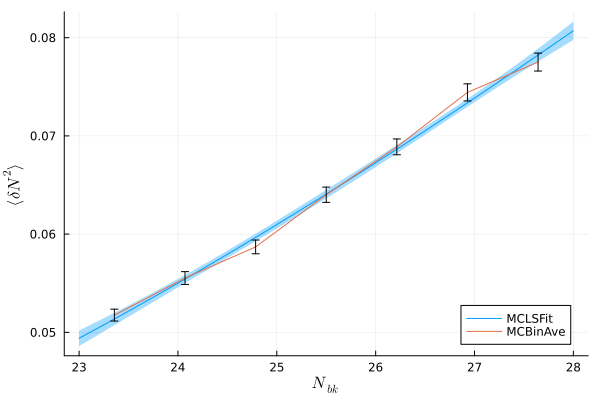

In [24]:
plot(NsPS, delNSqFitVals, ribbon = delNSqErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

In [25]:
savefig("delN2_chaotic.pdf")

"c:\\Users\\miyam\\Code\\StoInfMCLS\\TestCases\\delN2_chaotic.pdf"

In [13]:
psDfMS = CSV.read("calPlin_chaotic.csv", DataFrame, header=false)
NTotAve = mean([mean(NTotDf[:,"NTot1"]), mean(NTotDf[:,"NTot2"])])
sigma = 0.1
NsPSMS = NTotAve .- log.(psDfMS[:,1] / sigma)
psMS = psDfMS[:,2]

301-element Vector{Float64}:
 0.008214203519343223
 0.008202761133538489
 0.008191340867818132
 0.00817993127814075
 0.008168524931535295
 0.008157125697716119
 0.008145735344129032
 0.008134349296730316
 0.008122976794258326
 0.008111610850762245
 0.008100248893039931
 0.008088908081673547
 0.008077562753855386
 ⋮
 0.005207701527844134
 0.005198015702008258
 0.0051894545393933915
 0.005179902981694751
 0.005170975698216397
 0.0051619692789335045
 0.0051529038998894125
 0.0051435465547363295
 0.005134583733930802
 0.005125651894748279
 0.005116428882640943
 0.005107661525698027

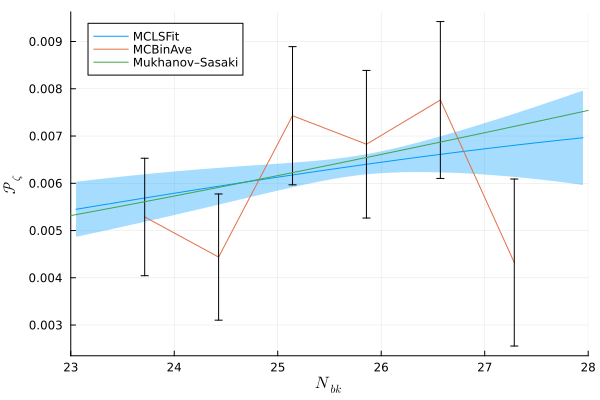

In [26]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="MCBinAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", xlim=(23,28))

In [27]:
savefig("PS_chaotic.pdf")

"c:\\Users\\miyam\\Code\\StoInfMCLS\\TestCases\\PS_chaotic.pdf"